# Advanced Data Mining Project 
### CRN:21999
 


Students Names: 

Abrar Radin.........G220054885 

Badour bin Salamah..G220000783




## Table of content 

Task one...............Choose Dataset.

Task two ..............Data Pre-processing.

Task Threee............Exploratory Data Analysis.

Task Four..............Bulding Model. 

data set Link : https://www.kaggle.com/datasets/mirosval/personal-cars-classifieds

In [1]:
# import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Task 1: Choose a Dataset
Choose a dataset from Kaggle.com or any other repository. The dataset size must be not less than 20 Mbytes (uncompressed).
Note: The dataset must have missing values, noise and outliers

In [3]:

# Load and Read Data
data = pd.read_csv("Classified_Ads_for_Cars.csv")
data.head()


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [4]:
# create dataset copy's

df = data.copy()

In [5]:
# print shape of the data set 
print('\n', "data shape is ",df.shape )


 data shape is  (3552912, 16)


# Task 2: Data Pre-processing
Read and understand the data carefully. What are the issues (e.g., missing values or noise) that you noticed in the dataset? Apply any cleaning method that you find fit and provide justification of your decisions. Your data cleaning should be comprehensive.

In [6]:
# Get more info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [7]:
# check data for duplicates

print("Number of duplicates: ", sum(df.duplicated()))

Number of duplicates:  0


The dataset has no dupicate values, we can proceed on with the analysis to check for missing values.

In [8]:
# check data for missing values

print("Number of missing values: ", df.isnull().sum().sum())

Number of missing values:  13811308


In [9]:
# show columns with missing values with their percentage(XX.XX%) 

print(df.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100)

maker                  14.605343
model                  31.899495
mileage                10.205263
manufacture_year       10.430261
engine_displacement    20.924076
engine_power           15.617527
body_type              31.605455
color_slug             94.103400
stk_year               48.077633
transmission           20.873863
door_count             17.292097
seat_count             21.095062
fuel_type              52.002583
dtype: float64


In [10]:
df_unexpected = df[[ 'seat_count', 'door_count', 'stk_year']]
for col in df_unexpected.columns:
    print("Col: ", col)
    # to print unique values only
    print(df_unexpected[col].unique(), end='\n\n') 
    

Col:  seat_count
['7' '5' '4' 'None' '6' '9' '8' '2' '3' '1' '18' '20' '10' '11' '15' '12'
 '16' '14' '50' '17' '74' '65' '19' '54' '13' '27' '45' '24' '56' '22'
 '255' '23' '57' '25' nan 5.0 3.0 4.0 2.0 7.0 8.0 6.0 9.0 23.0 1.0 51.0
 12.0 15.0 14.0 55.0 19.0 61.0 21.0 13.0 17.0 20.0 10.0 11.0 18.0 45.0
 27.0 53.0 26.0 56.0 58.0 25.0 30.0 36.0 54.0 24.0 16.0 57.0 74.0 50.0 0.0
 29.0 52.0 32.0 44.0 512.0 33.0 515.0 59.0 85.0 517.0 81.0 43.0 49.0 138.0]

Col:  door_count
['5' '3' '4' 'None' '2' '6' '1' '7' nan 5.0 4.0 3.0 2.0 6.0 1.0 9.0 7.0
 8.0 77.0 58.0 54.0 0.0 55.0 22.0 45.0 17.0 49.0]

Col:  stk_year
['None' '2017' '2016' '2015' '2018' '2107' '3000' '6800' '7900' '9500'
 '7990' '7732' '7201' '5900' '7761' '2019' '2500' '7762' '7257' '2680'
 '3600' '7375' '4000' '2100' '7310' '7765' '2101' '8000' '8200' '4500'
 '6047' '9000' '2200' '2280' '5500' '3500' '2250' '3200' '2108' '2071'
 '7000' '2600' '6000' '2510' '2295' '5000' '2020' '7500' '3300' '3900'
 '6500' '2900' '7399' '5800' '530

In [11]:
#Using drop() to delete rows based on column value
df['seat_count'] = pd.to_numeric(df['seat_count'], errors="coerce")
df.drop(df[df['seat_count'] >= 65].index, inplace = True)
# print seat count values to make sure unexpected data are removed 
print(df[ 'seat_count'].unique())

[ 7.  5.  4. nan  6.  9.  8.  2.  3.  1. 18. 20. 10. 11. 15. 12. 16. 14.
 50. 17. 19. 54. 13. 27. 45. 24. 56. 22. 23. 57. 25. 51. 55. 61. 21. 53.
 26. 58. 30. 36.  0. 29. 52. 32. 44. 33. 59. 43. 49.]


The color slug columns has 94% of the data missing. The best approach would be to drop the whole column as imputation in this case is not possible

In [12]:
# drop color_slug column
features_to_drop = [ 'stk_year', 'color_slug', 'door_count']

df.drop(features_to_drop, axis=1, inplace=True)

#print dataset columns to make sure that the columns are dropped 

df.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'transmission', 'seat_count', 'fuel_type',
       'date_created', 'date_last_seen', 'price_eur'],
      dtype='object')

### Filling columns with missing values

In [13]:
# replacing missing values 

# get numeric columns with missing values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# fill missing values with mean
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# get categorical columns with missing values
cat_cols = df.select_dtypes(include=['object']).columns

# fill missing values with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# check data for missing values
print("Number of missing values: ", df.isnull().sum().sum())

Number of missing values:  0


- The missing values have been filled with the mean and mode of the respective columns.

- The reason for this is that the mean and mode are the most common values in the respective columns.

- The mean is used for numeric columns and the mode for categorical columns.

- The reason for this is that the mean is a more accurate representation of the data than the mode.

- The mode is used for categorical columns because the mean is not a valid representation of the data in these columns.

- The mean is not a valid representation of the data in these columns because the mean is a numerical value and the data in these columns are categorical values.

In [14]:
# change date_created and date_last_seen to datetime
df['date_created'] = pd.to_datetime(df['date_created'])
df['date_last_seen'] = pd.to_datetime(df['date_last_seen'])

we change the date_created and date_last_seen columns to datetime because we want to be able to work with the data in these columns. 

In [15]:
# change manufacture_year to int
df['manufacture_year'] = df['manufacture_year'].astype('int64')

we change the manufacture_year column to int because float values are not valid for this column

In [16]:
# check that data has the appreciate type
df[['manufacture_year','date_last_seen','date_created']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3552899 entries, 0 to 3552911
Data columns (total 3 columns):
 #   Column            Dtype              
---  ------            -----              
 0   manufacture_year  int64              
 1   date_last_seen    datetime64[ns, UTC]
 2   date_created      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(1)
memory usage: 108.4 MB


# Task 3: Exploratory Data Analysis

1. Provide summary statistics for all variables. Find out the potential outliers, if any, for each variable.

In [17]:
# summary statistics for numeric columns
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,seat_count,price_eur
count,3.552899e+06,3.552899e+06,3.552899e+06,3.552899e+06,3.552899e+06,3.552899e+06
mean,1.158134e+05,2.000780e+03,2.043947e+03,9.846775e+01,4.868403e+00,1.625818e+06
std,3.243172e+05,7.734702e+01,1.755318e+03,4.507818e+01,7.828770e-01,2.025626e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.000000e-02
25%,2.350400e+04,2.002000e+03,1.560000e+03,7.400000e+01,4.868403e+00,1.295340e+03
50%,1.004850e+05,2.008000e+03,1.968000e+03,9.846775e+01,5.000000e+00,7.364910e+03
75%,1.497900e+05,2.013000e+03,2.043947e+03,1.100000e+02,5.000000e+00,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,6.100000e+01,2.706149e+12


In [18]:
# summary statistics for categorical columns
df.describe(include=['object'])

,maker,model,body_type,transmission,fuel_type
count,3552899,3552899,3552899,3552899,3552899
unique,46,1012,9,2,5
top,skoda,octavia,other,man,gasoline
freq,832739,1262918,3087195,2763611,2749820


## Check data for outliers

In [19]:
# use Z-score to find outliear
# Calculate the Z-score of each value in the numerical columns
z_scores = df[['mileage', 'manufacture_year', 'engine_displacement', 'engine_power', 'price_eur']].apply(
    lambda x: (x - x.mean()) / x.std())

# Identify outliers as values with a Z-score greater than or less than 3
outliers = np.where(np.abs(z_scores) > 3)

# Display the outliers
print("Outliers in the numerical columns:")
df.iloc[outliers[0]]



Outliers in the numerical columns:


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,seat_count,fuel_type,date_created,date_last_seen,price_eur
46,audi,a8,4000.000000,2014,4134.000000,317.000000,other,auto,4.000000,diesel,2015-11-14 18:10:08.564659+00:00,2016-01-27 20:40:15.463610+00:00,98692.30
245,bmw,octavia,119000.000000,2004,4398.000000,245.000000,other,auto,4.000000,gasoline,2015-11-14 18:55:23.981069+00:00,2016-01-27 20:40:15.463610+00:00,14766.84
471,ford,mustang,9200.000000,2015,5000.000000,324.000000,other,auto,4.868403,gasoline,2015-11-14 18:55:32.645793+00:00,2016-01-27 20:40:15.463610+00:00,44781.64
508,mercedes-benz,octavia,54000.000000,2010,4663.000000,320.000000,other,auto,4.000000,gasoline,2015-11-14 18:55:33.816497+00:00,2016-01-27 20:40:15.463610+00:00,58216.14
518,chevrolet,corvette,43260.000000,2005,5967.000000,297.000000,other,man,2.000000,gasoline,2015-11-14 18:55:34.527550+00:00,2016-01-27 20:40:15.463610+00:00,23316.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552776,skoda,fabia,144000.000000,1440,2043.947387,98.467745,other,man,4.868403,gasoline,2017-03-16 18:49:32.504658+00:00,2017-03-16 18:49:32.504658+00:00,1295.34
3552810,skoda,octavia,115813.376109,1300,1900.000000,98.467745,other,man,4.868403,electric,2017-03-16 18:51:57.367475+00:00,2017-03-16 18:51:57.367475+00:00,1295.34
3552818,skoda,superb,160000.000000,1600,2000.000000,125.000000,other,man,4.868403,electric,2017-03-16 18:52:41.951796+00:00,2017-03-16 18:52:41.951796+00:00,1295.34
3552832,skoda,superb,173000.000000,1730,2000.000000,125.000000,other,man,4.868403,electric,2017-03-16 18:53:27.944852+00:00,2017-03-16 18:53:27.944852+00:00,1295.34


In [20]:
# Remove the outliers
df = df.drop(df.index[outliers[0]])

In [21]:
# reset index
df.reset_index(drop=True, inplace=True)

In [22]:
print('\n', "data shape after cleaning processes is ",df.shape )


 data shape after cleaning processes is  (3418850, 13)


2. Create a heat map of the correlation matrix that shows correlation coefficients among all the variables in the dataset. What are your observations?

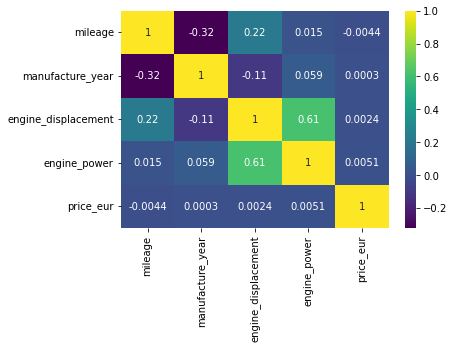

In [23]:
# Calculate the correlation matrix
corr = df[['mileage', 'manufacture_year', 'engine_displacement', 'engine_power','price_eur']].corr()

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='viridis')

# Show the plot
plt.show()

- The majority of the numeric columns exhibit low or no correlation, as indicated by the near-zero or negative correlation values. However, there is a notable exception, as engine displacement and engine power exhibit a strong positive correlation, as evidenced by the significant correlation value.

3. Deduct some statistical results from the datasets (at least two results and discuss it in detail)

In [24]:
#Statistical results
df[['mileage', 'manufacture_year', 'engine_displacement', 'engine_power', 'price_eur']].describe().round().astype(int)

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3418850,3418850,3418850,3418850,3418850
mean,99950,2007,1864,95,15508
std,83773,10,575,34,1322164
min,0,1769,0,1,0
25%,23287,2002,1560,74,1400
50%,100000,2008,1968,96,7400
75%,149500,2013,2044,105,15982
max,1086000,2017,7303,233,999999999


# Statistical deductions

- The average mileage of the vehicles is 99950 km.

- The average manufacture year of the vehicles is 2007.

- The average engine displacement of the vehicles is 1864 cc.

- The average engine power of the vehicles is 95 hp.

- The standard deviation of the mileage is 83773 km, which indicates that the mileage values are spread out over a large range. This suggests that there is a lot of variability in how the vehicles are used and maintained.

- The standard deviation of the manufacture year is 10. Smaller standard deviation indicates that the values are closer together,  which indicates that most of the vehicles were manufactured within a narrow range of years.

- The standard deviation of the engine displacement is 575 cc, which indicates that the engine displacement values are spread out over a moderate range.

- The standard deviation of the engine power is 34 hp. Smaller standard deviation indicates that the values are closer together, which suggests that most of the vehicles have similar engine power.


- The minimum mileage value is 0 km, and the maximum mileage value is 1086000 km.

- The minimum manufacture year value is 1769, and the maximum manufacture year value is 2017.

- The minimum engine displacement value is 0 cc, and the maximum engine displacement value is 7303 cc.

- The minimum engine power value is 1 hp, and the maximum engine power value is 233 hp.

- 25% of the vehicles have a mileage of less than 23288 km, 50% of the vehicles have a mileage of less than 100000 km, and 75% of the vehicles have a mileage of less than 149500 km.

- 25% of the vehicles were manufactured in 2002 or earlier, 50% of the vehicles were manufactured in 2008 or earlier, and 75% of the vehicles were manufactured in 2013 or earlier.

- 25% of the vehicles have an engine displacement of 1560 cc or less, 50% of the vehicles have an engine displacement of 1968 cc or less, and 75% of the vehicles have an engine displacement of 2044 cc or less.

- 25% of the vehicles have an engine power of 74 hp or less, 50% of the vehicles have an engine power of 96 hp or less, and 75% of the vehicles have an engine power of 105 hp or less.


# Task 4: 

1. Perform the normality test for the data and graphically represent the results. Transform the data if not normally distributed.

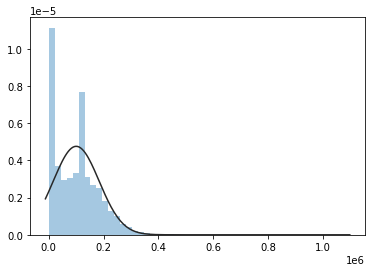

In [25]:
# Perform the normality test on the mileage column
from scipy import stats   
# Plot the data and normal distribution
mileage = df[['mileage']]
sns.distplot(mileage, fit=stats.norm, kde=False)
plt.show()

In [26]:
#Z-score normalization 
column = df['mileage']
normalized_mileage = (column - column.mean()) / column.std()
mileage = normalized_mileage

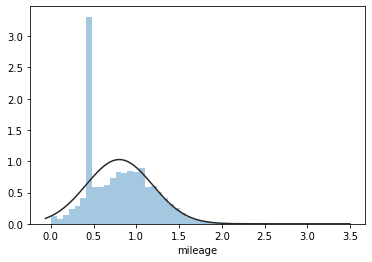

In [27]:
#Square-Root Transformation 
transform_mileage = mileage **(1/2)
sns.distplot(transform_mileage, fit=stats.norm, kde=False)
plt.show()

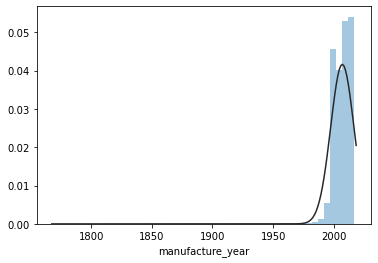

In [28]:
manufacture_year = df['manufacture_year']
# Plot the data and normal distribution
sns.distplot(manufacture_year, fit=stats.norm, kde=False)
plt.show()

In [29]:
column = df['manufacture_year']
normalized_column = (column - column.mean()) / column.std()
df['manufacture_year'] = normalized_column

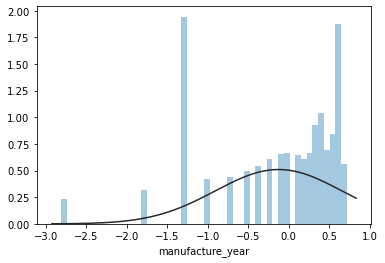

In [30]:

transform_manufacture_year = np.log1p(df["manufacture_year"])
sns.distplot(transform_manufacture_year, fit=stats.norm, kde=False)
plt.show()

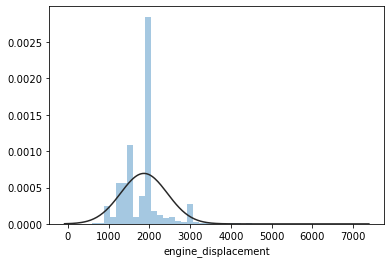

In [31]:
engine_displacement = df['engine_displacement']
# Plot the data and normal distribution
sns.distplot(engine_displacement, fit=stats.norm, kde=False)
plt.show()

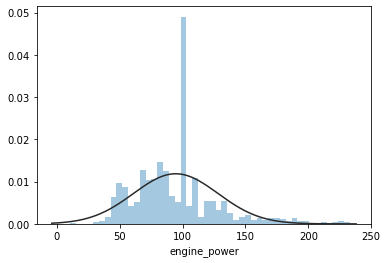

In [32]:
engine_power = df['engine_power']
# Plot the data and normal distribution
sns.distplot(engine_power, fit=stats.norm, kde=False)
plt.show()

Here you can see the engine_displacement and engine_power is normally distributed 

2. Develop any two classification/clustering/Regression models based on your dataset type. Briefly describe the interpretation of each model.

In [33]:
features_initial = ["mileage", "engine_displacement", "engine_power"]
target = "price_eur"

# with data having 3million rows, we will take a sample of 40000 rows
dfsample = df.sample(n=10000, random_state=42) 

X= dfsample[features_initial].values
y= dfsample[target].astype("int64")


In [34]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
import random
random.seed(1234)

## Classifier 

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

# Build a Random Forest model
model_rfc=RandomForestClassifier(n_estimators=10,random_state=1234)
# Fit the model
model_rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
# Calculate the score for test
rfc_score= model_rfc.score(X_test,y_test)

print ("rfc_score :",rfc_score)


rfc_score : 0.1015


## Regression

In [38]:
# Build a logistic regression model
from sklearn.linear_model import LogisticRegression
# solver and max_iter is used to solve the problem (STOP: TOTAL NO. of ITERATIONS REACHED LIMIT)
model = LogisticRegression(solver='lbfgs', max_iter=30, random_state=1234)
# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate the accuracy for test
model_mse= mean_squared_error(y_test, y_pred)
model_score= model.score(X_test,y_test)
print('Logistic Regression MSE: ',model_mse)
print("score: ", model_score)

Logistic Regression MSE:  247380728.8195
score:  0.193


In [39]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators=40,random_state=1234)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)




In [40]:
rfr_mse = mean_squared_error(y_test, rfr_pred)
print ("Random Forest Regressor MSE:", rfr_mse)

Random Forest Regressor MSE: 73771417.59761149


In [41]:
rfr_r2= r2_score(y_test,rfr_pred)
print ("R2",rfr_r2)

R2 0.536990683788692


The results for the sample data show the performance of a Random Forest Regressor model on a dataset. The mean squared error (MSE) is 73771417.59761149 and the R2 score is 0.536990683788692.

in this case, the positive R2 score suggests that the model is  providing a good fit to the data.

Overall, the results for the sample data suggest that the Random Forest Regressor model is  performing well on this dataset.

In [42]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=40,random_state=1234)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)
print('Gradient Boosting Regressor MSE: ', gbr_mse)
print("R2: ", gbr_r2)

Gradient Boosting Regressor MSE:  74178113.46157794
R2:  0.5344381508428269


The results for the Gradient Boosting Regressor model show similar trends as the previous Random Forest Regressor model. The mean squared error (MSE) is 74178113.46157794 and the R2 score is 0.5344381508428269.

in this case, the positive R2 score suggests that the model is  providing a good fit to the data.

Overall, the results for the sample data suggest that the Gradient Boosting Regressor mode is  performing well on this dataset.


3. Select one of the developed models and perform hyper-parameter tuning using best combination of model parameters. Compare the optimized model with the initial model and indicate whether the results are statistically significant?

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized search for hyperparameter tuning
param_dist = {'n_estimators': np.arange(25, 100, 25),
              'learning_rate': [0.01, 0.05, 0.1],
              'max_depth': [3, 5, 7]}
gbr = GradientBoostingRegressor(n_estimators=40,random_state=1234)
random_search = RandomizedSearchCV(
    gbr, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Best hyperparameters
print('Best parameters: ', random_search.best_params_)

# Evaluate performance on test data
gbr_pred = random_search.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_pred)
print('Gradient Boosting Regressor MSE: ', gbr_mse)

Best parameters:  {'n_estimators': 75, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting Regressor MSE:  67609169.05042931


The model with an MSE of 67609169.05042931 is a significant improvement compared to the previous models, which had MSE values of 73771417.59761149 for Random Forest Regressor and 74178113.46157794 for Gradient Boosting Regressor.
A lower MSE value indicates that the model is making more accurate predictions. A lower MSE value also suggests that the difference between the predicted values and the true values is smaller, which is desirable in a predictive model.